In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

In [2]:
df0 = pd.read_csv('../input/pertambangandata/datapertambangan.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  31 non-null     object 
 1   DER                      31 non-null     float64
 2   Operating Profit Margin  31 non-null     float64
 3   Return On Asset          31 non-null     float64
 4   Sales Growth             31 non-null     float64
 5   Category                 0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 1.6+ KB


In [3]:
df0.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,31.000000,31.000000,31.000000,31.000000,0.0
mean,-0.130656,73.220905,0.028207,0.339159,NaN
std,6.898275,204.450236,0.274507,0.464498,NaN
min,-26.250000,-230.610000,-1.190000,-0.371777,NaN
25%,0.310000,0.546326,-0.020000,0.000000,NaN
50%,0.580000,3.887000,0.020000,0.249980,NaN
75%,1.310000,40.055000,0.140000,0.698977,NaN
max,12.220000,744.890000,0.460000,1.185336,NaN


In [4]:
df0.drop(["Emitten","Category"], axis=1, inplace=True)

<Figure size 1080x1080 with 0 Axes>

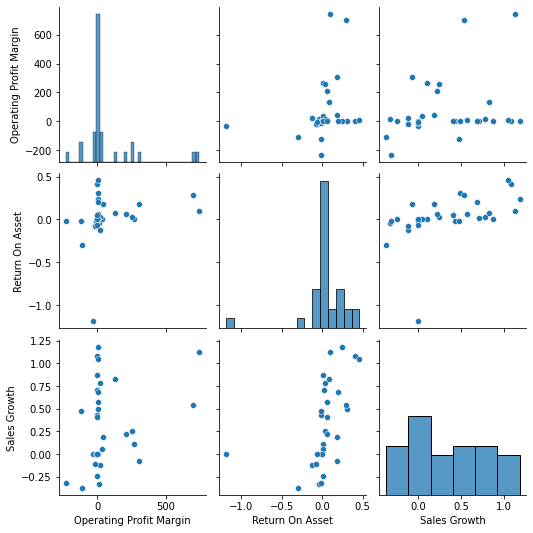

In [5]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

In [6]:
df0 = pd.read_csv('../input/pertambangandata/datapertambangan.csv')
df1 = df0[['DER','Operating Profit Margin' ,'Return On Asset','Sales Growth','Category']]
df1.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,31.000000,31.000000,31.000000,31.000000,0.0
mean,-0.130656,73.220905,0.028207,0.339159,NaN
std,6.898275,204.450236,0.274507,0.464498,NaN
min,-26.250000,-230.610000,-1.190000,-0.371777,NaN
25%,0.310000,0.546326,-0.020000,0.000000,NaN
50%,0.580000,3.887000,0.020000,0.249980,NaN
75%,1.310000,40.055000,0.140000,0.698977,NaN
max,12.220000,744.890000,0.460000,1.185336,NaN


<AxesSubplot:xlabel='Emitten', ylabel='Operating Profit Margin'>

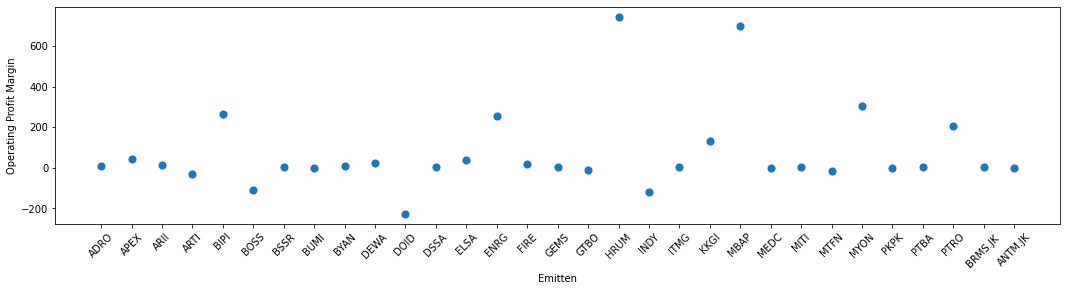

In [7]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='DER'>

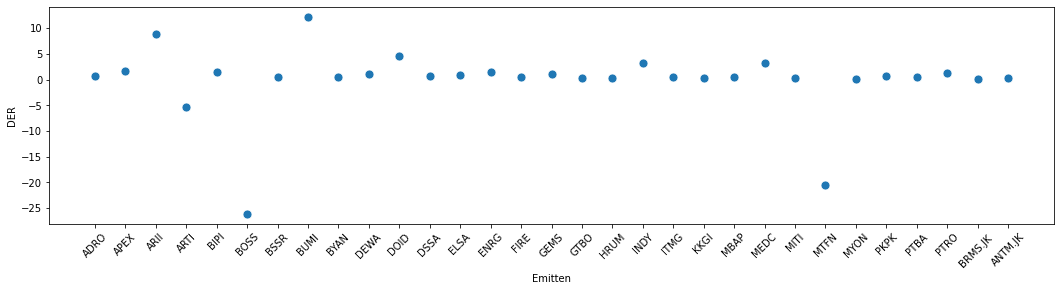

In [8]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='DER', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='Sales Growth'>

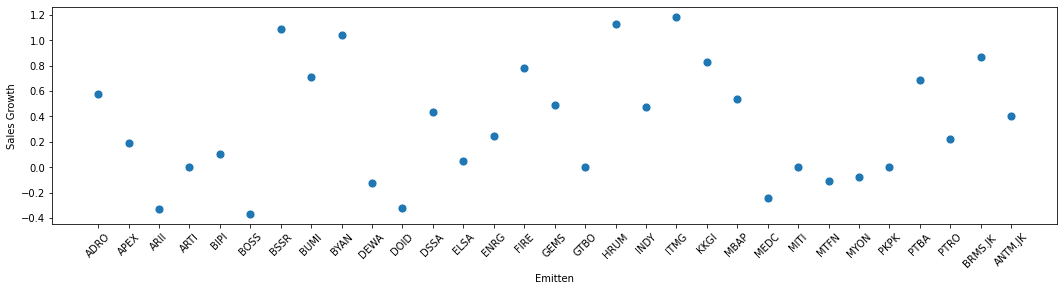

In [9]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Sales Growth', 
                data=df0, s=80)

In [10]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating Profit Margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 31
Jumlah baris setelah memfilter outlier: 29


In [11]:
df1.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,29.000000,29.000000,29.000000,29.000000,0.0
mean,-0.168287,28.456829,0.016704,0.304962,NaN
std,7.138746,112.163491,0.279227,0.454065,NaN
min,-26.250000,-230.610000,-1.190000,-0.371777,NaN
25%,0.310000,0.086652,-0.020000,0.000000,NaN
50%,0.650000,3.290000,0.010000,0.220287,NaN
75%,1.420000,24.640000,0.080000,0.688955,NaN
max,12.220000,304.460000,0.460000,1.185336,NaN


In [12]:
feats = ['DER','Operating Profit Margin','Sales Growth']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER,Operating Profit Margin,Sales Growth
count,2.900000e+01,2.900000e+01,2.900000e+01
mean,-2.584140e-17,1.914178e-18,1.722760e-17
std,1.017700e+00,1.017700e+00,1.017700e+00
min,-3.718212e+00,-2.350608e+00,-1.516781e+00
25%,6.818471e-02,-2.574130e-01,-6.835142e-01
50%,1.166552e-01,-2.283479e-01,-1.897838e-01
75%,2.264265e-01,-3.463149e-02,8.606468e-01
max,1.766076e+00,2.504278e+00,1.973190e+00


In [13]:
from sklearn.cluster import KMeans
wcss=[]

In [14]:
df0.shape

(31, 6)

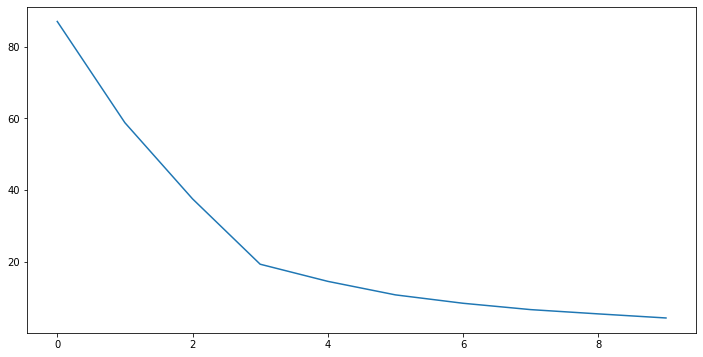

In [15]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=3, random_state=0)

In [17]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

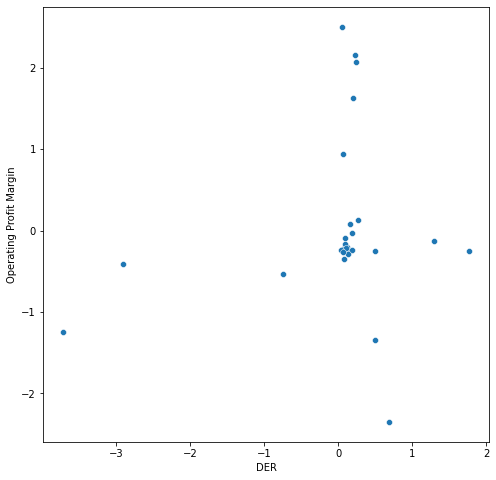

In [18]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [19]:
new_df.head(5)

,DER,Operating Profit Margin,Sales Growth,target,fit
0,0.116655,-0.197743,0.605543,NaN,1
1,0.264918,0.127873,-0.258399,NaN,0
2,1.298479,-0.121373,-1.420220,NaN,0
3,-0.750110,-0.531035,-0.683514,NaN,0
4,0.226426,2.154409,-0.442462,NaN,0


In [20]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 2
new_df.loc[new_df['fit'] == 1, 'Category'] = 4
new_df.loc[new_df['fit'] == 2, 'Category'] = 1
new_df.loc[new_df['fit'] == 3, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 3
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(6)

,Category,DER,Operating Profit Margin,Sales Growth,target,fit
0,4,0.116655,-0.197743,0.605543,NaN,1
1,2,0.264918,0.127873,-0.258399,NaN,0
2,2,1.298479,-0.121373,-1.420220,NaN,0
3,2,-0.750110,-0.531035,-0.683514,NaN,0
4,2,0.226426,2.154409,-0.442462,NaN,0
5,1,-3.718212,-1.247196,-1.516781,NaN,2


In [21]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Operating Profit Margin (St.)', 'Sales Growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       29 non-null     int64  
 1   DER (St.)                      29 non-null     float64
 2   Operating Profit Margin (St.)  29 non-null     float64
 3   Sales Growth (St.)             29 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.0 KB


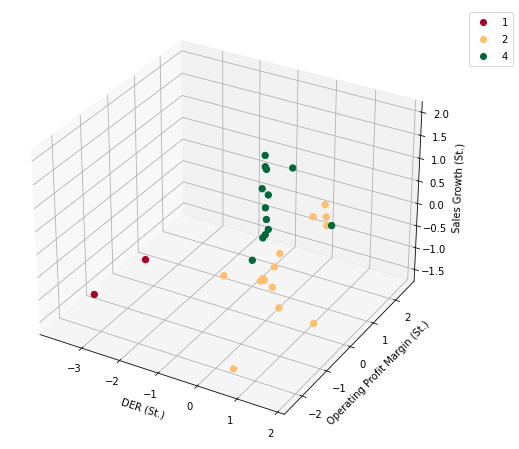

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating Profit Margin (St.)']
z = new_df['Sales Growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

Text(0.5, 1.05, 'DER vs Sales Growth (Standardisasi)')

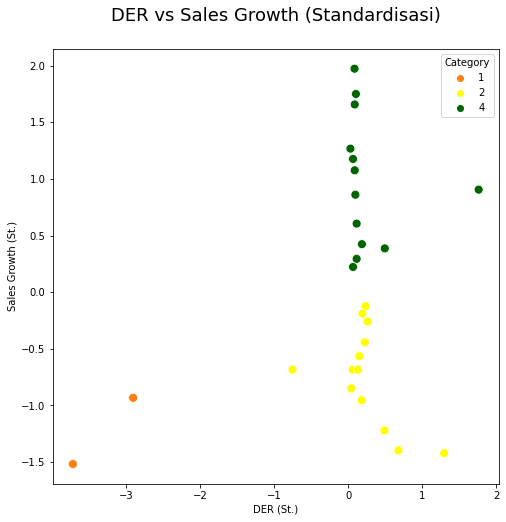

In [23]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)

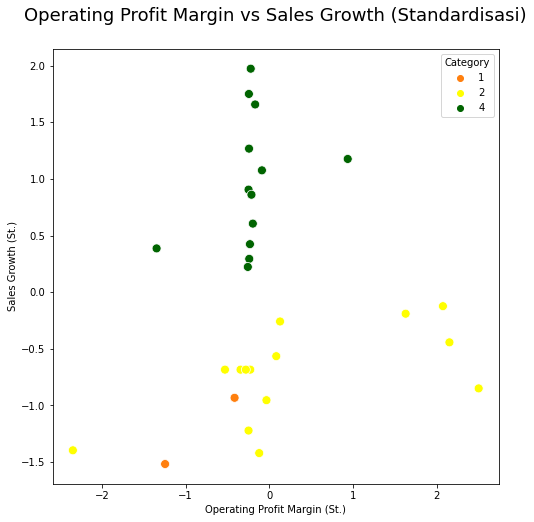

In [24]:
sns.scatterplot(x='Operating Profit Margin (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating Profit Margin vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

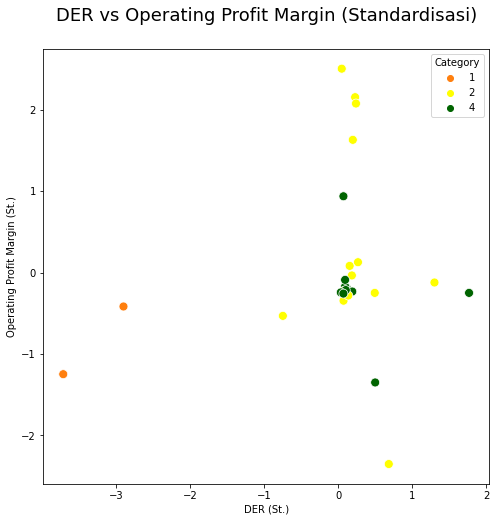

In [25]:
sns.scatterplot(x='DER (St.)', y='Operating Profit Margin (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()

In [26]:
# drop these row indexes
# from dataFrame
index_names = df0[ df0['Emitten'] == 'ARTO' ].index
df0.drop(index_names, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0.drop(["Category"
         ], axis=1, inplace=True)

In [27]:
dftemp = pd.read_csv('../input/pertambangandata/emittenpertambangan.csv')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(10)

,Emiten Pertambangan,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Emitten,DER,Operating Profit Margin,Return On Asset,Sales Growth
0,Adaro Energy Tbk. (ADOOY),4.0,0.116655,-0.197743,0.605543,ADRO,0.65,6.663,0.060000,0.575136
1,Atlas Resources Tbk. (ARII.JK),2.0,0.264918,0.127873,-0.258399,APEX,1.69,42.550,0.180000,0.189673
2,Borneo Olah Sarana Sukses Tbk (BOOSJ.K),2.0,1.298479,-0.121373,-1.420220,ARII,8.94,15.080,-0.038650,-0.328694
3,Bumi Resources Minerals Tbk. (BRMS.JK),2.0,-0.750110,-0.531035,-0.683514,ARTI,-5.43,-30.070,-1.190000,0.000000
4,Baramulti Suksessarana Tbk (BSSR.JK),2.0,0.226426,2.154409,-0.442462,BIPI,1.42,265.900,0.010000,0.107550
5,Bumi Resources Tbk. (BUMI.JK),1.0,-3.718212,-1.247196,-1.516781,BOSS,-26.25,-109.000,-0.300000,-0.371777
6,Darma Henwa Tbk (DEWA.JK),4.0,0.106676,-0.244725,1.750136,BSSR,0.58,1.485,0.410000,1.085816
7,Delta Dunia Makmur Tbk (DOID.JK),4.0,1.766076,-0.248944,0.905574,BUMI,12.22,1.020,0.020000,0.709000
8,Alfa Energi Investama Tbk. (FIRE.JK),4.0,0.090994,-0.169825,1.657391,BYAN,0.47,9.740,0.460000,1.044437
9,Golden Energy Mines Tbk. (GEMS.JK),2.0,0.182233,-0.034631,-0.953085,DEWA,1.11,24.640,-0.120227,-0.120274


In [28]:
df.to_csv('result.csv', index = False)

In [29]:
kmeans.cluster_centers_

array([[ 0.23518372,  0.31679685, -0.7251155 ],
       [ 0.25614109, -0.21322882,  0.96926911],
       [-3.31120307, -0.83159066, -1.22444069]])

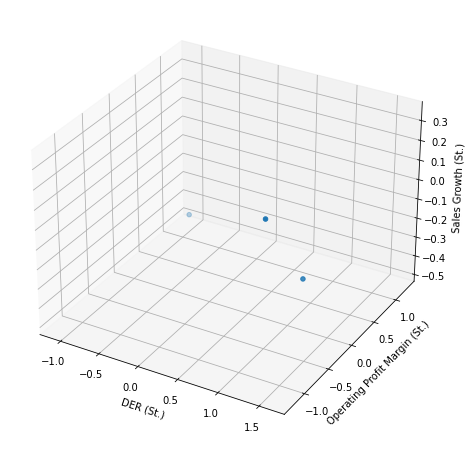

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [-1.0747699 ,  1.60761561,  1.45000206]
y = [ 1.25270712, -0.73415244, -1.22811141]
z = [-0.47688144, -0.04643691,  0.33540692]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")
ax.scatter(x, y, z)
plt.show()

In [31]:
#Highly Positively Impacted
df[df['Category'] == 4].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,4.0,0.256141,-0.213229,0.969269,1.703846,91.415846,0.156154,0.673714
std,0.0,0.468322,0.468885,0.579584,3.260858,223.092402,0.160236,0.375549
min,4.0,0.032762,-1.348999,0.223175,0.150000,-120.220000,-0.020000,-0.073845
25%,4.0,0.088143,-0.244725,0.424131,0.470000,1.946000,0.030000,0.477539
50%,4.0,0.099548,-0.232231,0.905574,0.580000,4.853000,0.100000,0.688955
75%,4.0,0.116655,-0.197743,1.267395,1.150000,18.660000,0.240000,1.044437
max,4.0,1.766076,0.937580,1.973190,12.220000,744.890000,0.460000,1.185336


In [32]:
#Highly Positively Impacted
df[df['Category'] == 3].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Highly Positively Impacted
df[df['Category'] == 2].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2.0,0.235184,0.316797,-0.725116,-0.257143,84.835000,-0.066348,0.078025
std,0.0,0.436893,1.319589,0.413724,6.574609,215.133781,0.340274,0.309262
min,2.0,-0.750110,-2.350608,-1.420220,-20.540000,-230.610000,-1.190000,-0.328694
25%,2.0,0.085648,-0.273202,-0.927070,0.312500,-7.790000,-0.054663,-0.083183
50%,2.0,0.188648,-0.078002,-0.683514,0.835000,19.860000,-0.010000,0.000000
75%,2.0,0.258146,1.254853,-0.473021,1.480000,109.480000,0.025000,0.169142
max,2.0,1.298479,2.504278,-0.123232,8.940000,699.710000,0.290000,0.829775


In [34]:
#Highly Positively Impacted
df[df['Category'] == 1].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,1.0,-3.311203,-0.831591,-1.224441,-11.485000,-53.997000,-0.145000,-0.305828
std,0.0,0.575598,0.587755,0.413431,20.880863,77.785989,0.219203,0.093265
min,1.0,-3.718212,-1.247196,-1.516781,-26.250000,-109.000000,-0.300000,-0.371777
25%,1.0,-3.514708,-1.039393,-1.370611,-18.867500,-81.498500,-0.222500,-0.338802
50%,1.0,-3.311203,-0.831591,-1.224441,-11.485000,-53.997000,-0.145000,-0.305828
75%,1.0,-3.107698,-0.623788,-1.078271,-4.102500,-26.495500,-0.067500,-0.272854
max,1.0,-2.904194,-0.415985,-0.932101,3.280000,1.006000,0.010000,-0.239880


In [35]:
#Highly Positively Impacted
df[df['Category'] == 0].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
